In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fancyimpute

In [108]:
df = pd.read_csv("random_subset.csv")
df.head()


,site,year,date,MonitorData,GFEDFireCarbon,USElevation_dsc10000,USElevation_max100,USElevation_max10000,USElevation_mea100,USElevation_mea10000,...,Nearby_Peak2Lag3_MeanTemperature,Nearby_Peak2Lag3_MinTemperature,OMAEROe_UVAerosolIndex_Mean,OMAEROe_VISAerosolIndex_Mean,OMAERUVd_UVAerosolIndex_Mean,OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean,OMO3PR,OMSO2e_ColumnAmountSO2_PBL_Mean,OMTO3e_ColumnAmountO3,OMUVBd_UVindex_Mean
12968698,2089,2006,2006-01-26,NaN,0.000000,73.987297,72.0,77.657501,69.0,73.954903,...,287.849070,278.150013,0.530,0.9950,0.546850,1.941235e+15,0.001023,NaN,302.150009,2.652945
3684565,594,2005,2005-07-27,12.4500,1.421119,57.862801,11.0,64.822502,7.0,57.674400,...,297.429655,288.691360,-0.500,-8.3950,0.375200,3.425424e+15,0.001029,0.070402,306.274994,5.757557
8902726,1434,2010,2010-05-23,7.2021,0.168180,15.590796,22.0,21.070801,18.0,14.590855,...,292.463305,285.329204,-0.535,-3.6725,0.336400,NaN,0.000907,NaN,341.875000,4.832584
4678115,754,2005,2005-06-07,NaN,0.000000,48.395401,46.0,55.554600,42.0,48.348202,...,293.770880,289.570761,-0.960,-12.5750,0.408467,3.251750e+15,0.000913,-0.090091,310.350006,8.212214
9079551,1463,2001,2001-06-14,NaN,0.000000,1257.494019,1220.0,1269.731812,1210.0,1257.504150,...,286.778733,283.691362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.apply(lambda x: x.count(), axis=0)


site                                              66943
year                                              66943
date                                              66943
MonitorData                                       14639
GFEDFireCarbon                                    66943
USElevation_dsc10000                              66877
USElevation_max100                                66877
USElevation_max10000                              66877
USElevation_mea100                                66815
USElevation_mea10000                              66877
USElevation_med100                                66851
USElevation_med10000                              66877
USElevation_min100                                66780
USElevation_min10000                              66877
USElevation_std100                                66877
USElevation_std10000                              66877
USElevation_bln100                                66809
USElevation_bln10000                            

In [4]:
print(df.shape)

(66943, 116)


In [27]:
for index, n in df["site"].value_counts(sort = True).iteritems():
    print("Site: {} | Count: {}".format( index , n))


Site: 114 | Count: 48
Site: 1075 | Count: 48
Site: 1499 | Count: 48
Site: 730 | Count: 47
Site: 663 | Count: 47
Site: 1043 | Count: 47
Site: 841 | Count: 46
Site: 2018 | Count: 46
Site: 321 | Count: 46
Site: 1672 | Count: 46
Site: 662 | Count: 46
Site: 135 | Count: 46
Site: 1605 | Count: 46
Site: 891 | Count: 46
Site: 1853 | Count: 45
Site: 351 | Count: 45
Site: 2033 | Count: 45
Site: 1687 | Count: 45
Site: 1847 | Count: 45
Site: 1481 | Count: 45
Site: 1426 | Count: 45
Site: 93 | Count: 45
Site: 343 | Count: 44
Site: 2036 | Count: 44
Site: 1269 | Count: 44
Site: 1973 | Count: 44
Site: 149 | Count: 44
Site: 1825 | Count: 44
Site: 231 | Count: 44
Site: 1265 | Count: 44
Site: 177 | Count: 44
Site: 76 | Count: 44
Site: 1539 | Count: 44
Site: 1134 | Count: 44
Site: 50 | Count: 43
Site: 1291 | Count: 43
Site: 2064 | Count: 43
Site: 824 | Count: 43
Site: 1940 | Count: 43
Site: 203 | Count: 43
Site: 1130 | Count: 43
Site: 681 | Count: 43
Site: 278 | Count: 43
Site: 1932 | Count: 43
Site: 1515 

In [5]:
print(max(df.site.unique()))
# number of sites - the set df.site.unique() has all integers from 1 to 2156, most likely 
# meaning that there are 2156 sites total

2156


In [6]:
for n in df.columns:
    print(n)

site
year
date
MonitorData
GFEDFireCarbon
USElevation_dsc10000
USElevation_max100
USElevation_max10000
USElevation_mea100
USElevation_mea10000
USElevation_med100
USElevation_med10000
USElevation_min100
USElevation_min10000
USElevation_std100
USElevation_std10000
USElevation_bln100
USElevation_bln10000
NLCD_Barren100
NLCD_Barren10000
NLCD_Developed100
NLCD_Developed10000
NLCD_Herbaceous100
NLCD_Herbaceous10000
NLCD_Planted100
NLCD_Planted10000
NLCD_Shrubland100
NLCD_Shrubland10000
NLCD_Water100
NLCD_Water10000
NLCD_Wetlands100
NLCD_Wetlands10000
NLCD_Impervious100
NLCD_Impervious10000
RoadDensity_primaryroads1000
RoadDensity_primaryroads10000
RoadDensity_prisecroads1000
RoadDensity_prisecroads10000
RoadDensity_roads1000
Business_Restaurant1000
PM25_Region
Ozone_Region
NO2_Region
MAIACUS_Optical_Depth_047_Aqua_Nearest4
MAIACUS_Optical_Depth_055_Aqua_Nearest4
MAIACUS_Optical_Depth_047_Terra_Nearest4
MAIACUS_Optical_Depth_055_Terra_Nearest4
MAIACUS_cosVZA_Aqua_Nearest
MAIACUS_cosVZA_Terra_

In [7]:
df.describe()

,site,year,MonitorData,GFEDFireCarbon,USElevation_dsc10000,USElevation_max100,USElevation_max10000,USElevation_mea100,USElevation_mea10000,USElevation_med100,...,Nearby_Peak2Lag3_MeanTemperature,Nearby_Peak2Lag3_MinTemperature,OMAEROe_UVAerosolIndex_Mean,OMAEROe_VISAerosolIndex_Mean,OMAERUVd_UVAerosolIndex_Mean,OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean,OMO3PR,OMSO2e_ColumnAmountSO2_PBL_Mean,OMTO3e_ColumnAmountO3,OMUVBd_UVindex_Mean
count,66943.000000,66943.000000,14639.000000,66943.000000,66877.000000,66877.000000,66877.000000,66815.000000,66877.000000,66851.000000,...,62900.000000,62900.000000,36390.000000,36335.000000,36948.000000,2.558100e+04,45956.000000,22365.000000,37320.000000,38933.000000
mean,1077.619856,2008.036778,10.042594,0.216929,441.721095,436.330353,450.696013,430.123700,441.631130,429.912372,...,285.927650,281.111734,0.199766,-9.798504,0.431423,2.578543e+15,0.001067,0.035384,307.874759,5.157990
std,623.005980,4.910376,7.389720,4.788176,576.411308,571.192322,580.292913,569.629374,576.450207,569.626976,...,9.998681,9.477339,0.826597,6.142201,0.916209,5.871053e+14,0.000115,0.423264,37.078323,3.093135
min,1.000000,2000.000000,0.002080,0.000000,-35.159500,-30.000000,-33.675400,-31.000000,-36.099899,-31.000000,...,255.441667,255.927778,-3.060000,-33.299999,0.000000,5.927176e+14,0.000663,-1.886842,215.100002,0.032164
25%,536.000000,2004.000000,5.100000,0.000000,73.947601,74.000000,80.281601,69.000000,73.853401,69.000000,...,278.704162,274.216572,-0.325000,-14.220000,0.208469,2.119483e+15,0.000981,-0.135166,283.324997,2.353704
50%,1077.000000,2008.000000,8.300000,0.000000,226.730896,222.000000,235.199799,214.000000,226.673401,214.000000,...,286.779379,281.483333,0.185000,-9.740000,0.329200,2.665136e+15,0.001058,0.019442,302.200005,4.985079
75%,1618.000000,2012.000000,12.913540,0.045563,432.941193,421.000000,446.107300,419.000000,432.867004,420.000000,...,294.027378,288.674663,0.690000,-5.225000,0.492175,3.053803e+15,0.001143,0.184117,327.056255,7.722930
max,2156.000000,2016.000000,114.318750,872.076536,3325.267822,3417.000000,3379.857422,3387.000000,3325.095215,3389.000000,...,327.534693,316.681673,9.300000,10.836666,29.252800,4.240576e+15,0.001645,29.257502,617.799988,14.027688


In [8]:
df_no_missing = df.dropna()
df_no_missing.shape 
# all rows have some missing data...

(0, 116)

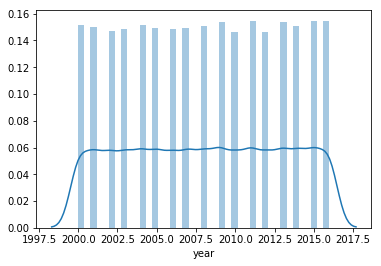

In [9]:
ax = sns.distplot(df.year)
plt.show()   

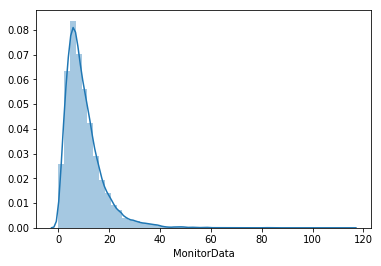

In [10]:
ax = sns.distplot(df.MonitorData.dropna())
plt.show()  

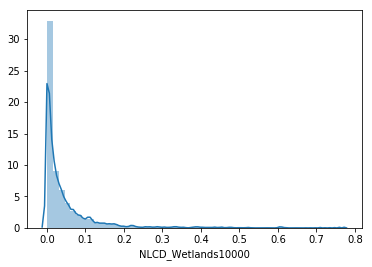

'\nwetland coverage from NLCD data set, the original 30 meter data were aggregated to \n10000 meter raster, then the code interpolate the 10000-meter raster to locations of interests\n'

In [11]:
ax = sns.distplot(df.NLCD_Wetlands10000.dropna())
plt.show()  
'''
wetland coverage from NLCD data set, the original 30 meter data were aggregated to 
10000 meter raster, then the code interpolate the 10000-meter raster to locations of interests
'''

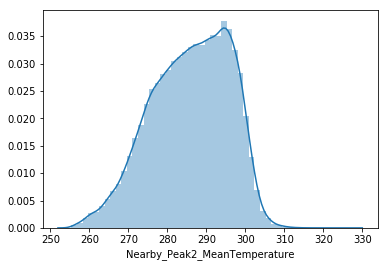

In [12]:
ax = sns.distplot(df.Nearby_Peak2_MeanTemperature.dropna())
plt.show()  

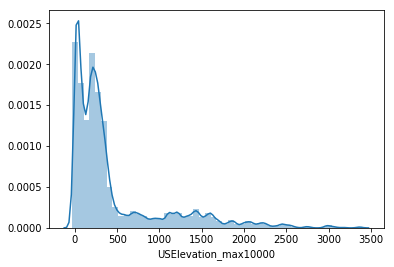

In [13]:
ax = sns.distplot(df.USElevation_max10000.dropna())
plt.show()  

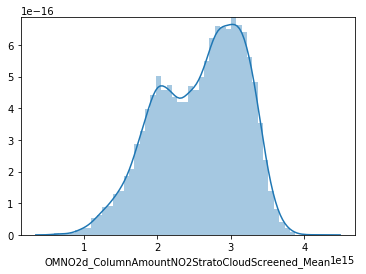

'\nSatellite-measured column NO2 concentration (some kind of averaging...?)\n'

In [14]:
ax = sns.distplot(df.OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean.dropna())
plt.show()  
'''
Satellite-measured column NO2 concentration (some kind of averaging...?)
'''

In [116]:
sites = pd.read_csv("gps_coord.csv")
sites
# from Qian's email, the coords in the cluster are in conic? (not GPS)

,SITEID,Lat,Lon
0,'010030010',30.49748,-87.88026
1,'010270001',33.28493,-85.80361
2,'010331002',34.76262,-87.63810
3,'010491003',34.28857,-85.96986
4,'010550010',33.99149,-85.99265
5,'010690003',31.22478,-85.39079
6,'010730023',33.55306,-86.81500
7,'010731005',33.33111,-87.00361
8,'010731010',33.54528,-86.54917
9,'010732003',33.49972,-86.92417


/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



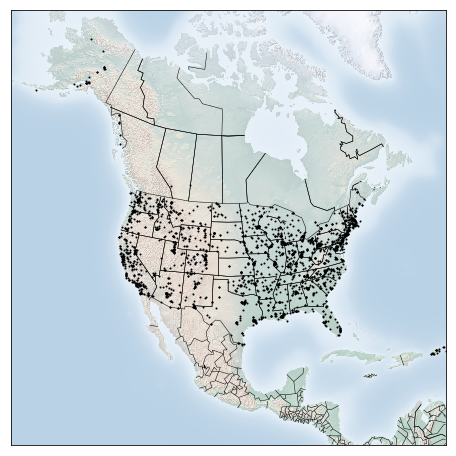

In [356]:
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.drawstates()
m.drawcountries()

# Map (long, lat) to (x, y) for plotting
# x, y = m(-122.3, 47.6)

for n in range(len(sites)):
    x, y = m(sites.Lon[n],  sites.Lat[n])
    
    plt.plot(x, y, 'ok', markersize=1)
    # plt.text(x, y, ' Seattle', fontsize=12);
m.shadedrelief(scale=0.5, alpha=0.5)
plt.show()

### Imputation

In [ ]:
subset = df
test = subset.loc[:, (subset.columns != 'site') & (subset.columns != 'date')]

knn_imputed = fancyimpute.KNN(k = 5).complete(test)
# mice_imputed = fancyimpute.MICE().complete(test)
test

In [23]:
pd.DataFrame(knn_imputed, columns = test.columns)

,year,MonitorData,GFEDFireCarbon,USElevation_dsc10000,USElevation_max100,USElevation_max10000,USElevation_mea100,USElevation_mea10000,USElevation_med100,USElevation_med10000,...,Nearby_Peak2Lag3_MeanTemperature,Nearby_Peak2Lag3_MinTemperature,OMAEROe_UVAerosolIndex_Mean,OMAEROe_VISAerosolIndex_Mean,OMAERUVd_UVAerosolIndex_Mean,OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean,OMO3PR,OMSO2e_ColumnAmountSO2_PBL_Mean,OMTO3e_ColumnAmountO3,OMUVBd_UVindex_Mean
0,2006.0,7.202100,0.000000,73.987297,72.0,77.657501,69.0,73.954903,69.0,73.968697,...,287.849070,278.150013,0.530000,0.995000,0.546850,1.941235e+15,0.001023,-0.019780,302.150009,2.652945
1,2005.0,12.450000,1.421119,57.862801,11.0,64.822502,7.0,57.674400,7.0,57.683300,...,297.429655,288.691360,-0.500000,-8.395000,0.375200,3.425424e+15,0.001029,0.070402,306.274994,5.757557
2,2010.0,7.202100,0.168180,15.590796,22.0,21.070801,18.0,14.590855,18.0,14.466927,...,292.463305,285.329204,-0.535000,-3.672500,0.336400,2.859115e+15,0.000907,0.027946,341.875000,4.832584
3,2005.0,7.202100,0.000000,48.395401,46.0,55.554600,42.0,48.348202,43.0,48.308800,...,293.770880,289.570761,-0.960000,-12.575000,0.408467,3.251750e+15,0.000913,-0.090091,310.350006,8.212214
4,2001.0,9.668466,0.000000,1257.494019,1220.0,1269.731812,1210.0,1257.504150,1210.0,1257.413574,...,286.778733,283.691362,-0.658452,-8.009896,0.371695,2.926780e+15,0.000948,-0.009326,320.455561,6.200581


## Pairwise Correlations

Here we try to reduce the dimensionality of the data by finding redundant columns.

In [15]:
column_groups = [
                    [col for col in df.columns if "USElevation" in col],
                    [col for col in df.columns if "NLCD" in col],
                    [col for col in df.columns if "RoadDensity" in col],
                    [col for col in df.columns if "MAIACUS" in col],
                    [col for col in df.columns if "REANALYSIS" in col],
                    [col for col in df.columns if "MOD11A1" in col],
                    [col for col in df.columns if "Nearby_Peak" in col],
                    [col for col in df.columns if "OMAE" in col]
                ]

correlations = []

for columns in column_groups:
    df_subset = df[columns]
    correlations.append(df_subset.corr())

Predictors displaying strong positive/negative correlations: ['USElevation_max100', 'USElevation_max10000', 'USElevation_mea100', 'USElevation_mea10000', 'USElevation_med100', 'USElevation_med10000', 'USElevation_min100', 'USElevation_min10000', 'USElevation_bln100', 'USElevation_bln10000', 'USElevation_dsc10000']
Non-correlated Columns: ['USElevation_std100', 'USElevation_std10000']


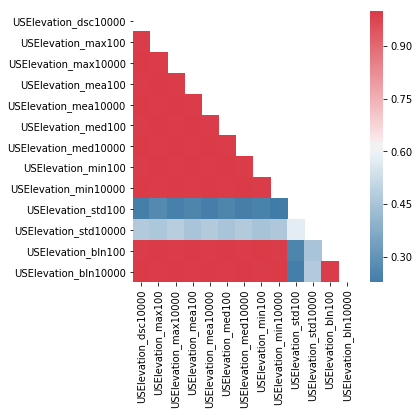

Predictors displaying strong positive/negative correlations: ['NLCD_Impervious100', 'NLCD_Impervious10000', 'NLCD_Developed100', 'NLCD_Developed10000']
Non-correlated Columns: ['NLCD_Barren100', 'NLCD_Barren10000', 'NLCD_Herbaceous100', 'NLCD_Herbaceous10000', 'NLCD_Planted100', 'NLCD_Planted10000', 'NLCD_Shrubland100', 'NLCD_Shrubland10000', 'NLCD_Water100', 'NLCD_Water10000', 'NLCD_Wetlands100', 'NLCD_Wetlands10000']


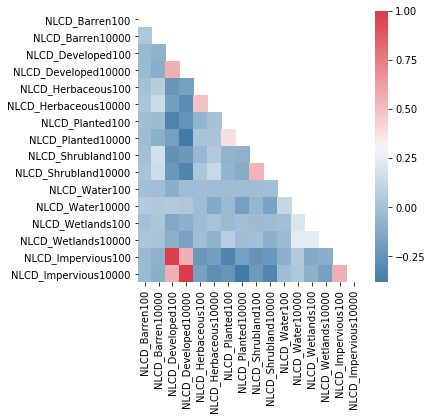

Predictors displaying strong positive/negative correlations: ['RoadDensity_prisecroads10000', 'RoadDensity_primaryroads10000']
Non-correlated Columns: ['RoadDensity_primaryroads1000', 'RoadDensity_prisecroads1000', 'RoadDensity_roads1000']


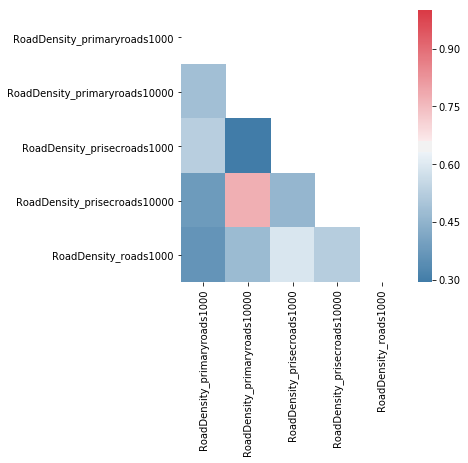

Predictors displaying strong positive/negative correlations: ['MAIACUS_Optical_Depth_055_Aqua_Nearest4', 'MAIACUS_Optical_Depth_047_Terra_Nearest4', 'MAIACUS_Optical_Depth_055_Terra_Nearest4', 'MAIACUS_Optical_Depth_047_Aqua_Nearest4']
Non-correlated Columns: ['MAIACUS_cosVZA_Aqua_Nearest', 'MAIACUS_cosVZA_Terra_Nearest']


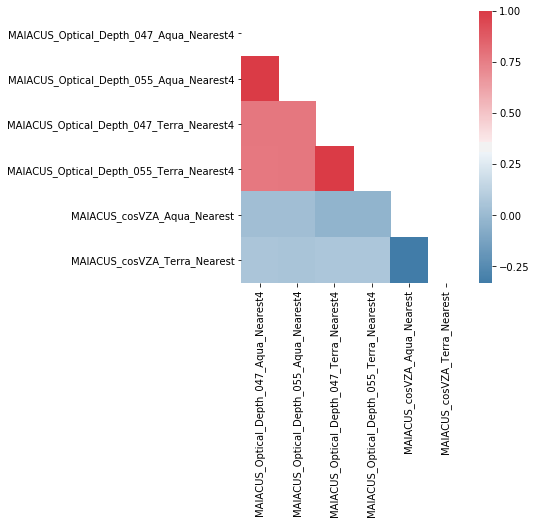

Predictors displaying strong positive/negative correlations: ['REANALYSIS_apcp_DailyMean', 'REANALYSIS_dlwrf_DailyMean', 'REANALYSIS_hpbl_DailyMean', 'REANALYSIS_shum_2m_DailyMean', 'REANALYSIS_prate_DailyMean', 'REANALYSIS_hpbl_DailyMin', 'REANALYSIS_shum_2m_DailyMin', 'REANALYSIS_vis_DailyMin', 'REANALYSIS_hpbl_1Day', 'REANALYSIS_shum_2m_1Day', 'REANALYSIS_air_sfc_DailyMin', 'REANALYSIS_air_sfc_DailyMean', 'REANALYSIS_air_sfc_DailyMax', 'REANALYSIS_hpbl_DailyMax', 'REANALYSIS_shum_2m_DailyMax', 'REANALYSIS_prate_DailyMax', 'REANALYSIS_dswrf_DailyMean', 'REANALYSIS_vis_DailyMean']
Non-correlated Columns: ['REANALYSIS_windspeed_10m_DailyMax', 'REANALYSIS_vis_DailyMax', 'REANALYSIS_evap_DailyMean', 'REANALYSIS_gflux_DailyMean', 'REANALYSIS_lhtfl_DailyMean', 'REANALYSIS_shtfl_DailyMean', 'REANALYSIS_snowc_DailyMean', 'REANALYSIS_soilm_DailyMean', 'REANALYSIS_tcdc_DailyMean', 'REANALYSIS_windspeed_10m_DailyMean', 'REANALYSIS_weasd_DailyMean', 'REANALYSIS_windspeed_10m_DailyMin', 'REANALYS

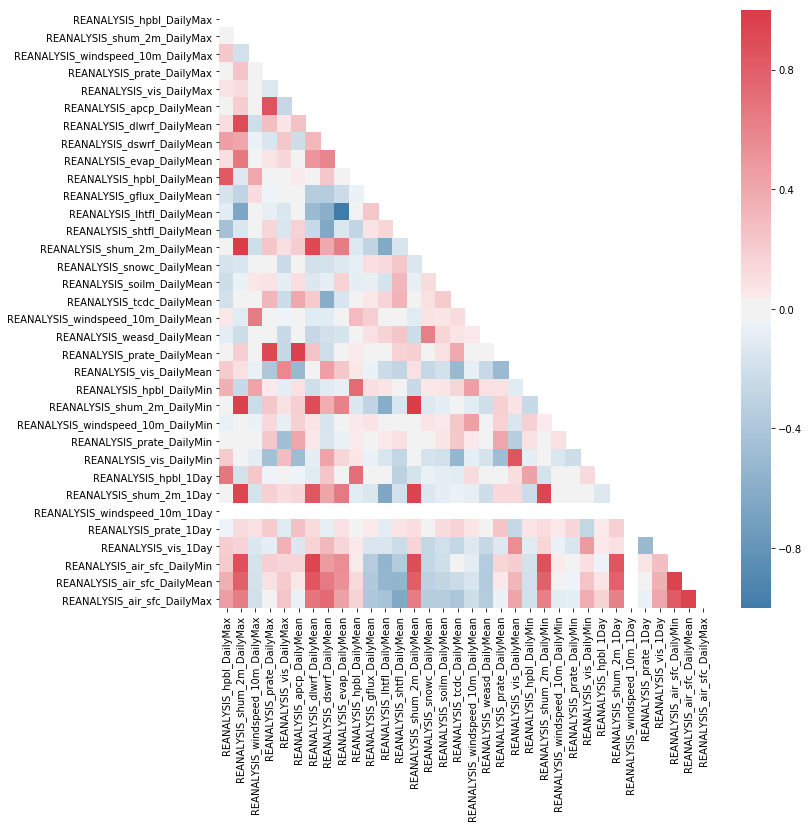

Predictors displaying strong positive/negative correlations: ['MOD11A1_LST_Night_1km_Nearest4', 'MOD11A1_LST_Day_1km_Nearest4']
Non-correlated Columns: ['MOD11A1_Clear_day_cov_Nearest4', 'MOD11A1_Clear_night_cov_Nearest4']


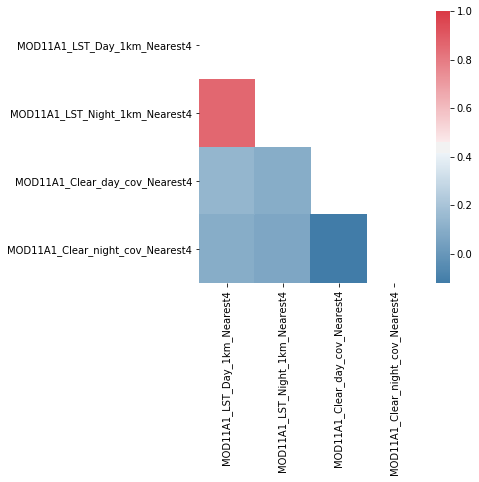

Predictors displaying strong positive/negative correlations: ['Nearby_Peak2Lag1_NO2', 'Nearby_Peak2Lag1_Ozone', 'Nearby_Peak2_MeanTemperature', 'Nearby_Peak2_MinTemperature', 'Nearby_Peak2Lag1_MaxTemperature', 'Nearby_Peak2Lag1_MeanTemperature', 'Nearby_Peak2Lag1_MinTemperature', 'Nearby_Peak2Lag3_MaxTemperature', 'Nearby_Peak2Lag3_MeanTemperature', 'Nearby_Peak2Lag3_MinTemperature', 'Nearby_Peak2_NO2', 'Nearby_Peak2_Ozone', 'Nearby_Peak2_MaxTemperature']
Non-correlated Columns: ['Nearby_Peak2_PM25', 'Nearby_Peak2Lag1_PM25', 'Nearby_Peak2Lag3_NO2', 'Nearby_Peak2Lag3_PM25', 'Nearby_Peak2Lag3_Ozone']


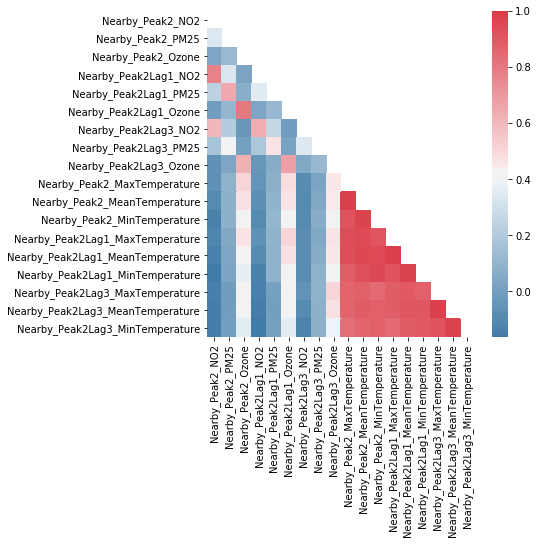

Predictors displaying strong positive/negative correlations: []
Non-correlated Columns: ['OMAEROe_UVAerosolIndex_Mean', 'OMAEROe_VISAerosolIndex_Mean', 'OMAERUVd_UVAerosolIndex_Mean']


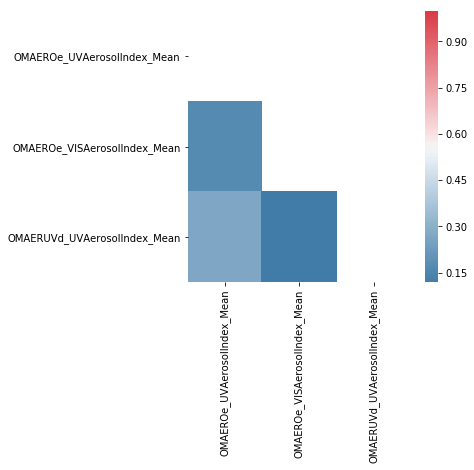

In [145]:
cmap = sns.diverging_palette(240, 10, as_cmap=True)

for corr in correlations:
    fig, ax = plt.subplots()
    
    size = max(5, len(corr) // 3)
    fig.set_size_inches(size, size)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(corr, mask = mask, cmap = cmap)

    corr = corr.mask(mask)

    positive = corr[corr > 0.7].dropna(how = "all", axis = 1).dropna(how = "all", axis = 0)
    negative = corr[corr < -0.7].dropna(how = "all", axis = 1).dropna(how = "all", axis = 0)

    unique = [index for index in positive.index]
    unique.extend([col for col in positive.columns if col not in positive.index])
    
    non_corr = [col for col in corr.columns if col not in unique]
    print("Predictors displaying strong positive/negative correlations: {}".format(unique))
    
    print("Non-correlated Columns: {}".format(non_corr))
    plt.show()

## Baseline Linear Regression Model

In [361]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [120]:
df.head()

,site,year,date,MonitorData,GFEDFireCarbon,USElevation_dsc10000,USElevation_max100,USElevation_max10000,USElevation_mea100,USElevation_mea10000,...,Nearby_Peak2Lag3_MeanTemperature,Nearby_Peak2Lag3_MinTemperature,OMAEROe_UVAerosolIndex_Mean,OMAEROe_VISAerosolIndex_Mean,OMAERUVd_UVAerosolIndex_Mean,OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean,OMO3PR,OMSO2e_ColumnAmountSO2_PBL_Mean,OMTO3e_ColumnAmountO3,OMUVBd_UVindex_Mean
12968698,2089,2006,2006-01-26,NaN,0.000000,73.987297,72.0,77.657501,69.0,73.954903,...,287.849070,278.150013,0.530,0.9950,0.546850,1.941235e+15,0.001023,NaN,302.150009,2.652945
3684565,594,2005,2005-07-27,12.4500,1.421119,57.862801,11.0,64.822502,7.0,57.674400,...,297.429655,288.691360,-0.500,-8.3950,0.375200,3.425424e+15,0.001029,0.070402,306.274994,5.757557
8902726,1434,2010,2010-05-23,7.2021,0.168180,15.590796,22.0,21.070801,18.0,14.590855,...,292.463305,285.329204,-0.535,-3.6725,0.336400,NaN,0.000907,NaN,341.875000,4.832584
4678115,754,2005,2005-06-07,NaN,0.000000,48.395401,46.0,55.554600,42.0,48.348202,...,293.770880,289.570761,-0.960,-12.5750,0.408467,3.251750e+15,0.000913,-0.090091,310.350006,8.212214
9079551,1463,2001,2001-06-14,NaN,0.000000,1257.494019,1220.0,1269.731812,1210.0,1257.504150,...,286.778733,283.691362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
sites.iloc[df["site"] - 1].head()

,SITEID,Lat,Lon
2088,'060831007',34.94803,-120.43544
593,'360010005',42.64225,-73.75464
1433,'NEYO1',40.81610,-73.90190
753,'421010076',39.98884,-75.20682
1462,'300490018',46.60382,-112.03611


In [292]:
df["Lat"] = sites.iloc[df["site"] - 1]["Lat"].as_matrix()
df["Lon"] = sites.iloc[df["site"] - 1]["Lon"].as_matrix()

df.head()

,site,year,date,MonitorData,GFEDFireCarbon,USElevation_dsc10000,USElevation_max100,USElevation_max10000,USElevation_mea100,USElevation_mea10000,...,OMAEROe_UVAerosolIndex_Mean,OMAEROe_VISAerosolIndex_Mean,OMAERUVd_UVAerosolIndex_Mean,OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean,OMO3PR,OMSO2e_ColumnAmountSO2_PBL_Mean,OMTO3e_ColumnAmountO3,OMUVBd_UVindex_Mean,Lat,Lon
12968698,2089,2006,2006-01-26,NaN,0.000000,73.987297,72.0,77.657501,69.0,73.954903,...,0.530,0.9950,0.546850,1.941235e+15,0.001023,NaN,302.150009,2.652945,34.94803,-120.43544
3684565,594,2005,2005-07-27,12.4500,1.421119,57.862801,11.0,64.822502,7.0,57.674400,...,-0.500,-8.3950,0.375200,3.425424e+15,0.001029,0.070402,306.274994,5.757557,42.64225,-73.75464
8902726,1434,2010,2010-05-23,7.2021,0.168180,15.590796,22.0,21.070801,18.0,14.590855,...,-0.535,-3.6725,0.336400,NaN,0.000907,NaN,341.875000,4.832584,40.81610,-73.90190
4678115,754,2005,2005-06-07,NaN,0.000000,48.395401,46.0,55.554600,42.0,48.348202,...,-0.960,-12.5750,0.408467,3.251750e+15,0.000913,-0.090091,310.350006,8.212214,39.98884,-75.20682
9079551,1463,2001,2001-06-14,NaN,0.000000,1257.494019,1220.0,1269.731812,1210.0,1257.504150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.60382,-112.03611


In [384]:
df_year_subset = df[df["year"] == 2010]

# df_year_subset = df[df["year"] == 2010].drop_duplicates(subset = "site") 
# should we drop duplicate sites??? If we do, we get a lower R^2
df_year_subset.head()

,site,year,date,MonitorData,GFEDFireCarbon,USElevation_dsc10000,USElevation_max100,USElevation_max10000,USElevation_mea100,USElevation_mea10000,...,OMAEROe_UVAerosolIndex_Mean,OMAEROe_VISAerosolIndex_Mean,OMAERUVd_UVAerosolIndex_Mean,OMNO2d_ColumnAmountNO2StratoCloudScreened_Mean,OMO3PR,OMSO2e_ColumnAmountSO2_PBL_Mean,OMTO3e_ColumnAmountO3,OMUVBd_UVindex_Mean,Lat,Lon
8902726,1434,2010,2010-05-23,7.20210,0.16818,15.590796,22.0,21.070801,18.0,14.590855,...,-0.5350,-3.6725,0.336400,NaN,0.000907,NaN,341.875000,4.832584,40.81610,-73.90190
11330773,1825,2010,2010-03-21,NaN,0.00000,38.230839,5.0,51.527500,2.0,37.934700,...,0.5000,-4.1200,0.269367,NaN,0.000873,NaN,401.050003,2.180916,46.97228,-123.83173
3711139,598,2010,2010-04-26,NaN,0.00000,188.044800,180.0,190.529495,172.0,188.013107,...,-1.1125,-0.2075,0.226450,NaN,0.000996,NaN,342.825005,2.808241,42.49963,-79.31881
612272,99,2010,2010-02-08,3.70417,0.00000,319.510590,196.0,342.514191,193.0,319.387695,...,0.5650,-6.4750,0.513700,NaN,0.000981,NaN,334.799988,2.117263,39.15047,-123.20655
11281091,1817,2010,2010-03-19,NaN,0.00000,85.652802,109.0,95.326202,105.0,85.649597,...,2.0500,-12.5150,1.373933,2.236403e+15,0.000835,NaN,376.225006,4.386485,40.04962,-75.24082


In [385]:
print(df_year_subset.shape)


(3832, 118)


In [386]:
df_year_subset = df_year_subset.dropna(subset = ["MonitorData"])[["Lat", "Lon", "date", "USElevation_max100", 'NLCD_Impervious100',
             'REANALYSIS_apcp_DailyMean', 'MonitorData', 
             'NLCD_Barren100', 'NLCD_Barren10000', 'NLCD_Herbaceous100', 
             'NLCD_Herbaceous10000', 'NLCD_Planted100', 'NLCD_Planted10000',
            'NLCD_Shrubland100', 'NLCD_Shrubland10000', 'NLCD_Water100', 
          'NLCD_Water10000', 'NLCD_Wetlands100', 'NLCD_Wetlands10000', 
         'REANALYSIS_hpbl_DailyMax', 'REANALYSIS_lhtfl_DailyMean', 'GFEDFireCarbon', 
         'Nearby_Peak2_MeanTemperature', 'MOD09A1']]
df_year_subset = df_year_subset.dropna()
df_year_subset

,Lat,Lon,date,USElevation_max100,NLCD_Impervious100,REANALYSIS_apcp_DailyMean,MonitorData,NLCD_Barren100,NLCD_Barren10000,NLCD_Herbaceous100,...,NLCD_Shrubland10000,NLCD_Water100,NLCD_Water10000,NLCD_Wetlands100,NLCD_Wetlands10000,REANALYSIS_hpbl_DailyMax,REANALYSIS_lhtfl_DailyMean,GFEDFireCarbon,Nearby_Peak2_MeanTemperature,MOD09A1
8902726,40.81610,-73.90190,2010-05-23,22.0,99.0,0.092232,7.202100,0.0,0.00018,0.0,...,0.00086,0.0,0.19082,0.0,0.01738,976.753403,-100.787323,0.168180,289.162239,664.985357
612272,39.15047,-123.20655,2010-02-08,196.0,81.0,0.013762,3.704170,0.0,0.00040,0.0,...,0.21466,0.0,0.01240,0.0,0.00160,1109.790649,-33.695190,0.000000,278.702055,683.875762
6512098,48.73160,-121.06460,2010-12-31,560.0,20.0,0.000064,0.352700,0.0,0.02380,0.0,...,0.07616,0.0,0.10560,0.0,0.00020,571.756134,-6.289337,0.000000,267.936474,445.682327
6089701,41.97580,-70.02420,2010-09-05,40.0,0.0,0.000000,2.930000,0.0,0.04008,0.0,...,0.01270,0.0,0.39062,0.0,0.08320,1696.573151,-143.378113,0.000000,291.876852,99.762478
1407160,28.59639,-81.36250,2010-02-16,37.0,7.0,0.000000,4.000000,0.0,0.00020,0.0,...,0.01010,0.0,0.12022,0.0,0.08786,1573.990021,-71.375946,0.183844,279.603202,543.925070
997519,36.33218,-119.29123,2010-09-23,110.0,75.0,0.000000,10.700000,0.0,0.00224,0.0,...,0.00000,0.0,0.00030,0.0,0.00000,2578.368286,0.004272,0.075289,293.751852,683.831411
1699302,42.97825,-112.45581,2010-11-15,1365.0,30.0,0.252686,1.725000,0.0,0.00008,0.0,...,0.16536,0.0,0.00110,0.0,0.03820,3377.164001,-6.174866,0.000000,276.790256,5228.331828
4773184,34.61537,-80.19879,2010-09-08,138.0,0.0,0.019043,14.700000,0.0,0.00310,0.0,...,0.03886,0.0,0.00650,0.0,0.14646,2564.116333,-76.191315,0.089668,298.150036,288.752144
1879269,38.70453,-90.13967,2010-07-15,135.0,92.0,0.059814,20.300000,0.0,0.00168,0.0,...,0.00000,0.0,0.19394,0.0,0.12886,2326.326843,-172.798370,0.231855,302.608633,564.543298
2264287,41.53001,-90.58761,2010-07-13,220.0,35.0,0.003418,10.500000,0.0,0.00000,0.0,...,0.00000,0.0,0.06662,0.0,0.02842,1469.244995,-150.333435,0.195230,298.057407,489.009472


/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



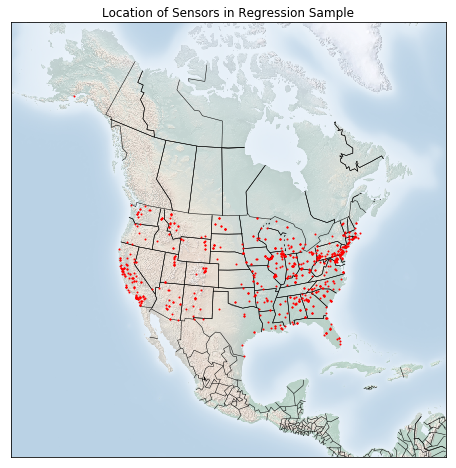

In [387]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.drawstates()
m.drawcountries()

longitude = df_year_subset["Lon"].as_matrix()
latitude  = df_year_subset["Lat"].as_matrix()


for n in range(len(df_year_subset)):
    x, y = m(longitude[n], latitude[n])
    
    plt.plot(x, y, 'ok', markersize=1, color = 'r')

plt.title("Location of Sensors in Regression Sample")
m.shadedrelief(scale=0.5, alpha=0.5)
plt.show()

In [388]:
df_year_subset["month"] = [date.month for date in pd.to_datetime(df_year_subset["date"])]
df_year_subset.head()

,Lat,Lon,date,USElevation_max100,NLCD_Impervious100,REANALYSIS_apcp_DailyMean,MonitorData,NLCD_Barren100,NLCD_Barren10000,NLCD_Herbaceous100,...,NLCD_Water100,NLCD_Water10000,NLCD_Wetlands100,NLCD_Wetlands10000,REANALYSIS_hpbl_DailyMax,REANALYSIS_lhtfl_DailyMean,GFEDFireCarbon,Nearby_Peak2_MeanTemperature,MOD09A1,month
8902726,40.81610,-73.90190,2010-05-23,22.0,99.0,0.092232,7.20210,0.0,0.00018,0.0,...,0.0,0.19082,0.0,0.01738,976.753403,-100.787323,0.168180,289.162239,664.985357,5
612272,39.15047,-123.20655,2010-02-08,196.0,81.0,0.013762,3.70417,0.0,0.00040,0.0,...,0.0,0.01240,0.0,0.00160,1109.790649,-33.695190,0.000000,278.702055,683.875762,2
6512098,48.73160,-121.06460,2010-12-31,560.0,20.0,0.000064,0.35270,0.0,0.02380,0.0,...,0.0,0.10560,0.0,0.00020,571.756134,-6.289337,0.000000,267.936474,445.682327,12
6089701,41.97580,-70.02420,2010-09-05,40.0,0.0,0.000000,2.93000,0.0,0.04008,0.0,...,0.0,0.39062,0.0,0.08320,1696.573151,-143.378113,0.000000,291.876852,99.762478,9
1407160,28.59639,-81.36250,2010-02-16,37.0,7.0,0.000000,4.00000,0.0,0.00020,0.0,...,0.0,0.12022,0.0,0.08786,1573.990021,-71.375946,0.183844,279.603202,543.925070,2


In [389]:
df_year_subset = pd.get_dummies(df_year_subset, columns = ["month"])
df_year_subset.head()

,Lat,Lon,date,USElevation_max100,NLCD_Impervious100,REANALYSIS_apcp_DailyMean,MonitorData,NLCD_Barren100,NLCD_Barren10000,NLCD_Herbaceous100,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
8902726,40.81610,-73.90190,2010-05-23,22.0,99.0,0.092232,7.20210,0.0,0.00018,0.0,...,0,0,1,0,0,0,0,0,0,0
612272,39.15047,-123.20655,2010-02-08,196.0,81.0,0.013762,3.70417,0.0,0.00040,0.0,...,0,0,0,0,0,0,0,0,0,0
6512098,48.73160,-121.06460,2010-12-31,560.0,20.0,0.000064,0.35270,0.0,0.02380,0.0,...,0,0,0,0,0,0,0,0,0,1
6089701,41.97580,-70.02420,2010-09-05,40.0,0.0,0.000000,2.93000,0.0,0.04008,0.0,...,0,0,0,0,0,0,1,0,0,0
1407160,28.59639,-81.36250,2010-02-16,37.0,7.0,0.000000,4.00000,0.0,0.00020,0.0,...,0,0,0,0,0,0,0,0,0,0


In [390]:
subset_train, subset_test = train_test_split(df_year_subset, test_size=0.2, random_state=42)

X_train = subset_train[[col for col in df_year_subset.columns if 
                        col not in ["date", "MonitorData"]]]

X_test  = subset_test[ [col for col in df_year_subset.columns if 
                        col not in ["date", "MonitorData"]]]

y_train = subset_train["MonitorData"]
y_test  = subset_test["MonitorData"]


In [391]:
X_train.head()

,Lat,Lon,USElevation_max100,NLCD_Impervious100,REANALYSIS_apcp_DailyMean,NLCD_Barren100,NLCD_Barren10000,NLCD_Herbaceous100,NLCD_Herbaceous10000,NLCD_Planted100,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
6921946,37.19830,-113.15080,1224.0,0.0,0.920347,0.0,0.00880,0.0,0.00442,0.0,...,0,0,0,0,0,0,0,0,0,1
4723485,41.61524,-71.72000,91.0,0.0,0.007299,0.0,0.00812,0.0,0.00136,1.0,...,0,0,0,0,0,1,0,0,0,0
2171098,41.82328,-90.21198,199.0,38.0,0.594971,0.0,0.00076,0.0,0.02348,0.0,...,0,0,0,1,0,0,0,0,0,0
357977,37.74307,-122.16993,14.0,86.0,0.220703,0.0,0.00020,0.0,0.02300,0.0,...,0,0,0,0,0,0,0,0,0,1
2071788,39.81110,-86.11447,235.0,52.0,0.109619,0.0,0.00000,0.0,0.00000,0.0,...,0,0,0,0,1,0,0,0,0,0


In [392]:
y_train.head()

6921946     0.87820
4723485     9.90833
2171098    10.20000
357977      5.40833
2071788    18.20000
Name: MonitorData, dtype: float64

In [393]:
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train.as_matrix(), y_train)
linreg.score(X_test, y_test)

0.18247424713933824

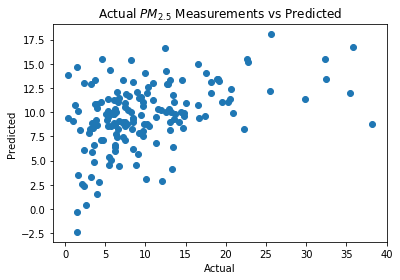

In [394]:
plt.scatter(y_test, linreg.predict(X_test))
plt.title("Actual $PM_{2.5}$ Measurements vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## LASSO Regression

In [411]:
alphas = [10**n for n in range(-5, 4)]

best_score = -2**32
best_params = None
best_param = None

for alpha in alphas:   
    lasso = Lasso(alpha, fit_intercept=True, normalize = True)
    lasso.fit(X_train.as_matrix(), y_train)

    if lasso.score(X_test, y_test) > best_score:
        best_score = lasso.score(X_test, y_test)
        best_params = [a for a in zip(X_test.columns, lasso.coef_)]
        best_param = alpha
    
print("Best regularization parameter: {}".format(best_param))
print("Score: {}".format(best_score))
for a in best_params:
    print("\t{}".format(a))


Best regularization parameter: 1e-05
Score: 0.18247205958751245
	('Lat', 0.097187638194988407)
	('Lon', 0.079667431718558834)
	('USElevation_max100', -0.00070837964947753846)
	('NLCD_Impervious100', -0.004892932175335033)
	('REANALYSIS_apcp_DailyMean', -1.6996526033666279)
	('NLCD_Barren100', 0.0)
	('NLCD_Barren10000', -5.208272275390093)
	('NLCD_Herbaceous100', -1.7773883610161927)
	('NLCD_Herbaceous10000', -2.203500462369639)
	('NLCD_Planted100', -1.7433870679614378)
	('NLCD_Planted10000', 2.0396935091119897)
	('NLCD_Shrubland100', -2.7729375893572383)
	('NLCD_Shrubland10000', -2.3138154830547601)
	('NLCD_Water100', -5.3771187988425133)
	('NLCD_Water10000', 0.95201066865446093)
	('NLCD_Wetlands100', -3.8325640764627966)
	('NLCD_Wetlands10000', -9.1768005705893163)
	('REANALYSIS_hpbl_DailyMax', -0.0016195465186048179)
	('REANALYSIS_lhtfl_DailyMean', 0.010915395268240438)
	('GFEDFireCarbon', 0.23461424907737005)
	('Nearby_Peak2_MeanTemperature', 0.22892861511194784)
	('MOD09A1', 0.0007

In [420]:
for a in best_params:
    if abs(a[1]) > 1e-2:
        print("\'{}\'".format(a[0]), end = ",")

'Lat','Lon','REANALYSIS_apcp_DailyMean','NLCD_Barren10000','NLCD_Herbaceous100','NLCD_Herbaceous10000','NLCD_Planted100','NLCD_Planted10000','NLCD_Shrubland100','NLCD_Shrubland10000','NLCD_Water100','NLCD_Water10000','NLCD_Wetlands100','NLCD_Wetlands10000','REANALYSIS_lhtfl_DailyMean','GFEDFireCarbon','Nearby_Peak2_MeanTemperature','month_1','month_2','month_3','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12',

In [425]:
# important_predictors = ['Lat','Lon','REANALYSIS_apcp_DailyMean',
#                 'NLCD_Barren10000','NLCD_Herbaceous100','NLCD_Herbaceous10000',
#                 'NLCD_Planted100','NLCD_Planted10000','NLCD_Shrubland100',
#                 'NLCD_Shrubland10000','NLCD_Water100','NLCD_Water10000',
#                 'NLCD_Wetlands100','NLCD_Wetlands10000','REANALYSIS_hpbl_DailyMax',
#                 'REANALYSIS_lhtfl_DailyMean','GFEDFireCarbon','Nearby_Peak2_MeanTemperature',
#                 'month_1','month_2','month_3','month_5','month_6',
#                 'month_7','month_8','month_9','month_10','month_11','month_12']


important_predictors = ['Lat','Lon','USElevation_max100','NLCD_Impervious100','REANALYSIS_apcp_DailyMean',
                'NLCD_Barren10000','NLCD_Herbaceous100','NLCD_Herbaceous10000',
                'NLCD_Planted100','NLCD_Planted10000','NLCD_Shrubland100',
                'NLCD_Shrubland10000','NLCD_Water100','NLCD_Water10000',
                'NLCD_Wetlands100','NLCD_Wetlands10000','REANALYSIS_hpbl_DailyMax',
                'REANALYSIS_lhtfl_DailyMean','GFEDFireCarbon','Nearby_Peak2_MeanTemperature',
                'month_1','month_2','month_3','month_5','month_6',
                'month_7','month_8','month_9','month_10','month_11','month_12']


linreg_important = LinearRegression(fit_intercept=True, normalize = True)
linreg_important.fit(X_train[important_predictors].as_matrix(), y_train)
linreg_important.score(X_test[important_predictors].as_matrix(), y_test)

0.19238384728070002

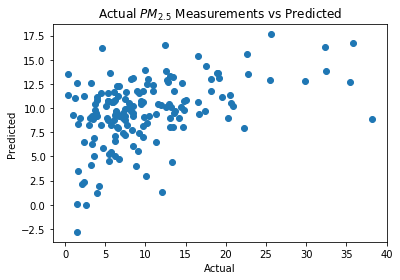

In [426]:
plt.scatter(y_test, linreg_important.predict(X_test[important_predictors].as_matrix()))
plt.title("Actual $PM_{2.5}$ Measurements vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [429]:
outlier_set = df_year_subset[df_year_subset["MonitorData"] > 20]
outlier_set.head()

,Lat,Lon,date,USElevation_max100,NLCD_Impervious100,REANALYSIS_apcp_DailyMean,MonitorData,NLCD_Barren100,NLCD_Barren10000,NLCD_Herbaceous100,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1879269,38.70453,-90.13967,2010-07-15,135.0,92.0,0.059814,20.300000,0.0,0.00168,0.0,...,0,0,0,0,1,0,0,0,0,0
2115369,41.69669,-86.21468,2010-11-12,233.0,95.0,0.000000,46.562500,0.0,0.00200,0.0,...,0,0,0,0,0,0,0,0,1,0
5648607,44.50729,-87.99344,2010-03-05,184.0,96.0,0.000484,21.014585,0.0,0.00222,0.0,...,1,0,0,0,0,0,0,0,0,0
1500277,31.57692,-84.10019,2010-01-14,75.0,77.0,0.000977,29.800000,0.0,0.00850,0.0,...,0,0,0,0,0,0,0,0,0,0
2226838,41.41439,-91.06261,2010-01-05,202.0,32.0,0.003418,20.100000,0.0,0.00096,0.0,...,0,0,0,0,0,0,0,0,0,0


#### Now we try to get a sense of what is causing the higher values (PM2.5 measurement above 20).

/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



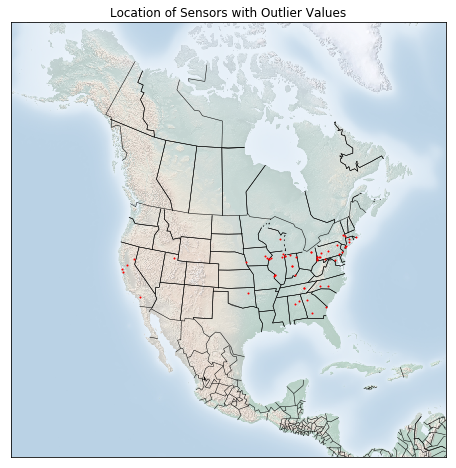

In [432]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.drawstates()
m.drawcountries()

longitude = outlier_set["Lon"].as_matrix()
latitude  = outlier_set["Lat"].as_matrix()


for n in range(len(outlier_set)):
    x, y = m(longitude[n], latitude[n])
    
    plt.plot(x, y, 'ok', markersize=1, color = 'r')

plt.title("Location of Sensors with Outlier Values")
m.shadedrelief(scale=0.5, alpha=0.5)
plt.show()

No apparent geographic correlations. The majority is in the eastern half of the country.

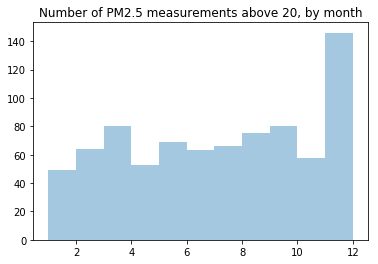

In [459]:
ax = sns.distplot([date.month for date in pd.to_datetime(df_year_subset["date"])], 
                  hist = True, kde = False, bins = range(1, 13))
plt.title("Number of PM2.5 measurements above 20, by month")
plt.show()  

Interestingly, there is a large spike of the number of high PM2.5 measurements in December. We will try doing a regression on all data not from December.

In [461]:
subset_train, subset_test = train_test_split(df_year_subset[df_year_subset['month_12'] == 0], test_size=0.2, random_state=42)

X_train = subset_train[[col for col in df_year_subset.columns if 
                        col not in ["date", "MonitorData"]]]

X_test  = subset_test[ [col for col in df_year_subset.columns if 
                        col not in ["date", "MonitorData"]]]

y_train = subset_train["MonitorData"]
y_test  = subset_test["MonitorData"]


non_december_train = X_train
non_december_test  = X_test

In [462]:
alphas = [10**n for n in range(-5, 4)]

best_score = -2**32
best_params = None
best_param = None

for alpha in alphas:   
    lasso = Lasso(alpha, fit_intercept=True, normalize = True)
    lasso.fit(non_december_train.as_matrix(), y_train)

    if lasso.score(non_december_test, y_test) > best_score:
        best_score = lasso.score(non_december_test, y_test)
        best_params = [a for a in zip(non_december_test.columns, lasso.coef_)]
        best_param = alpha
    
print("Best regularization parameter: {}".format(best_param))
print("Score: {}".format(best_score))
for a in best_params:
    print("\t{}".format(a))


Best regularization parameter: 1e-05
Score: 0.33035193125021656
	('Lat', 0.067519832837886845)
	('Lon', 0.043379246859460867)
	('USElevation_max100', -0.0012573143756324039)
	('NLCD_Impervious100', 0.0033818552287538648)
	('REANALYSIS_apcp_DailyMean', -1.4497332306094404)
	('NLCD_Barren100', 0.0)
	('NLCD_Barren10000', -0.012228628304168519)
	('NLCD_Herbaceous100', -1.443092323308391)
	('NLCD_Herbaceous10000', -1.6928414034808859)
	('NLCD_Planted100', -1.4328504500351178)
	('NLCD_Planted10000', 1.4420948056432437)
	('NLCD_Shrubland100', -0.71991037301428373)
	('NLCD_Shrubland10000', -4.1268007503067583)
	('NLCD_Water100', -5.926957216382629)
	('NLCD_Water10000', -2.8321816088283298)
	('NLCD_Wetlands100', -2.660197874596796)
	('NLCD_Wetlands10000', -7.902803720109544)
	('REANALYSIS_hpbl_DailyMax', -0.0011020599444684889)
	('REANALYSIS_lhtfl_DailyMean', 0.00064418810092604212)
	('GFEDFireCarbon', 0.82901600658592411)
	('Nearby_Peak2_MeanTemperature', 0.22201076587625193)
	('MOD09A1', 0.00

/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



In [463]:
lasso = Lasso(alpha = 1e-5, fit_intercept=True, normalize = True)
lasso.fit(non_december_train.as_matrix(), y_train)


/Users/justinlee/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

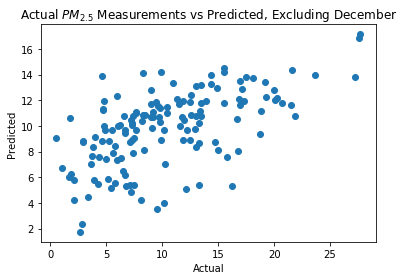

In [464]:
plt.scatter(y_test, lasso.predict(non_december_test.as_matrix()))
plt.title("Actual $PM_{2.5}$ Measurements vs Predicted, Excluding December")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()